In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import csv

In [28]:
#dataset = pd.read_csv('X_trainData_1.csv')
#labels=pd.read_csv('Y_trainData_1.csv')
dataset = pd.read_csv('X_24hrs.csv')
datalabels = pd.read_csv('y_mumbai.csv')
#datalabels=pd.read_csv('2005-2008_yvalue_mumbai.csv')


#X_train=dataset.iloc[:,:].values

X=dataset.iloc[:,1:].values
y=datalabels.iloc[:,1:].values
#y_train=datalabels.iloc[:,-1].values
#y=datalabels.iloc[:,-1].values

In [29]:
print(X.shape)
print(X)

(2440, 9900)
[[300.87     292.05     276.39     ...  20.        28.75      35.25    ]
 [300.47     291.72     275.92     ...  28.25      70.250015  59.000015]
 [300.99     290.92     276.07     ...  26.75      65.500015  47.750015]
 ...
 [300.07498  290.55     275.35     ...  46.5       61.5       48.25    ]
 [300.14996  290.9      275.575    ...  47.25      62.        22.      ]
 [300.5      290.8      275.77496  ...  32.75      66.5       19.      ]]


In [30]:
print(y.shape)
print(y)

(2440, 1)
[[ 0.        ]
 [19.535807  ]
 [ 0.        ]
 ...
 [ 1.0364816 ]
 [ 0.18965113]
 [ 0.18965113]]


In [31]:
print(y.mean())
print(y.std())
mean_rf=y.mean()
std_rf=y.std()
thr=mean_rf+std_rf

18.48259008901639
29.95223440768119


In [32]:
count=0
for i in range(0, len(y)):

  if y[i]>thr:
    y[i]=1
    count=count+1
  else:
    y[i]=0
print(count)
print(y)


268
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [33]:
print(X.max())

102920.0


In [34]:
#X_normal=(X-X.min())/(X.max()-X.min())
#print(X_normal)





In [35]:
#print(X_normal.shape)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [ ]:
from xgboost import XGBClassifier
#classifier = XGBClassifier(scale_pos_weight=20)
classifier = XGBClassifier(scale_pos_weight=10)
classifier.fit(X_train, y_train.ravel())

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[391  37]
 [ 30  30]]


In [18]:
#precision=cm[1][1]/(cm[1][1]+cm[0][1])
#recall=cm[1][1]/(cm[1][1]+cm[1][0])

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
print('Accuracy- '+str(accuracy_score(y_test, y_pred)))
print('Precision- '+str(precision_score(y_test,y_pred)))
print('Recall- '+str(recall_score(y_test, y_pred)))
print("ROC_AUC score- "+str(roc_auc_score(y_test, y_pred)))
print('F1-score- '+str(f1_score(y_test, y_pred)))


Accuracy- 0.8627049180327869
Precision- 0.44776119402985076
Recall- 0.5
ROC_AUC score- 0.7067757009345794
F1-score- 0.4724409448818898


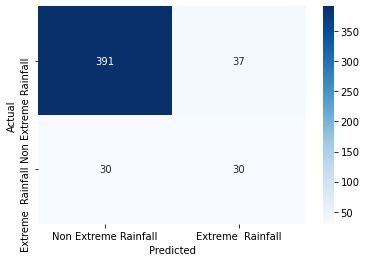

In [20]:
import seaborn as sn


df = pd.DataFrame(cm, index = ['Non Extreme Rainfall', 'Extreme  Rainfall'], columns = ['Non Extreme Rainfall', 'Extreme  Rainfall'])

# Plot the heatmap
sn.heatmap(df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()